<a href="https://colab.research.google.com/github/clobos/Andres_ESALQ/blob/main/graduacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudantes de Graduação

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
dados_estudantes_de_graduacao = pd.read_csv('estudante_de_graduacao.csv')

colunas_para_excluir_graduacao = [
    'Programa_pós',
    'Nível',
    'Departamento',
    'Setor',
    'Origem_vist',
    'C_funcio'
]

dados_estudantes_de_graduacao = dados_estudantes_de_graduacao.drop(columns=colunas_para_excluir_graduacao, errors='ignore')

In [212]:
dados_estudantes_de_graduacao = dados_estudantes_de_graduacao[dados_estudantes_de_graduacao['Ano_ingresso'] != "0"]

dados_estudantes_de_graduacao = dados_estudantes_de_graduacao[dados_estudantes_de_graduacao['C_PAPFE'] != "0"]

dados_estudantes_de_graduacao = dados_estudantes_de_graduacao[dados_estudantes_de_graduacao['C_moradia'] != "0"]

dados_estudantes_de_graduacao = dados_estudantes_de_graduacao[dados_estudantes_de_graduacao['C_Rucas'] != "0"]

dados_estudantes_de_graduacao = dados_estudantes_de_graduacao[dados_estudantes_de_graduacao['C_estudo'] != "0"]

# Deletar Curso_grad = "Não resposta"
dados_estudantes_de_graduacao = dados_estudantes_de_graduacao[dados_estudantes_de_graduacao['Curso_grad'] != "Não resposta"]


In [213]:
dados_estudantes_de_graduacao['Ano_ingresso'] = pd.to_numeric(dados_estudantes_de_graduacao['Ano_ingresso']).astype(int)
display(dados_estudantes_de_graduacao['Ano_ingresso'].dtype)

dtype('int64')

In [214]:
dados_estudantes_de_graduacao.head()

,Idade,Vínculo,Sexo,Ano_ingresso,Curso_grad,Frequencia,Campus_agradavel,Impacto,Participação,Particip_fora,...,C_estudo,C_int,C_infacd,C_orgtrans,C_qveic,C_visit,C_santi,C_mobl,C_aPSaude,Interesse_ativ
0,De 36 a 45 anos,Estudante de Graduação,Feminino,2022,Engenharia Agronômica,Apenas em dias úteis (de segunda a sexta),Sim,Sim,Conheço e já participei,"Sim, em outros lugares",...,Ruim,Regular,Regular,NaN,Péssimo,Péssimo,Péssimo,Bom,Não sei opinar,Bastante
1,De 18 a 25 anos,Estudante de Graduação,Feminino,2020,Ciências Biológicas,Apenas em dias úteis (de segunda a sexta),Sim,Em partes,Conheço e já participei,Não,...,Bom,Regular,Ótimo,Regular,Regular,Bom,Ruim,Ruim,Bom,Bastante
2,De 18 a 25 anos,Estudante de Graduação,Prefiro não responder,2022,Ciências Econômicas,Apenas em dias úteis (de segunda a sexta),Sim,Não,"Conheço, mas não participei",Não,...,Bom,Bom,Bom,Bom,Regular,Não sei opinar,Ruim,Regular,Bom,Pouco
3,De 18 a 25 anos,Estudante de Graduação,Masculino,2019,Engenharia Agronômica,Diariamente (de segunda a domingo),Sim,Em partes,Conheço e já participei,Não,...,Bom,Regular,Bom,Regular,Ruim,Bom,Ruim,Regular,Regular,Pouco
4,De 18 a 25 anos,Estudante de Graduação,Masculino,2024,Administração,Diariamente (de segunda a domingo),Não,Não,Não conheço,"Sim, no meu bairro/comunidade",...,Bom,Ruim,Ótimo,Péssimo,Péssimo,Não sei opinar,Não sei opinar,Ruim,Péssimo,Bastante


In [215]:
print(dados_estudantes_de_graduacao.columns)

Index(['Idade', 'Vínculo', 'Sexo', 'Ano_ingresso', 'Curso_grad', 'Frequencia',
       'Campus_agradavel', 'Impacto', 'Participação', 'Particip_fora',
       'Interesse', 'Conhecimento', 'Compromisso', 'Transformador',
       'Segurança', 'Alt_seg_noite', 'Distância', 'Modal_atecampus', 'S_Ilum',
       'S_ag', 'S_equ', 'S_vias', 'S_cal', 'S_acess', 'S_sinal', 'S_ciclovias',
       'Aplicativo', 'C_Acol', 'C_pert', 'C_Sau', 'C_atendaluno', 'C_PAPFE',
       'C_moradia', 'C_cre', 'C_gen', 'C_etn', 'C_aces', 'C_Rucas', 'C_alim',
       'C_conv', 'C_esp', 'C_estudo', 'C_int', 'C_infacd', 'C_orgtrans',
       'C_qveic', 'C_visit', 'C_santi', 'C_mobl', 'C_aPSaude',
       'Interesse_ativ'],
      dtype='object')


In [216]:
#dados_estudantes_de_graduacao.info()

In [217]:
def clean_idade(idade_str):
    """Removes 'De', 'a', and 'anos' from the idade string and returns a list of numbers."""
    if pd.isna(idade_str):
        return None
    cleaned = idade_str.replace('De ', '').replace(' a ', '-').replace(' anos', '').replace(' ', '')
    if '-' in cleaned:
        return [int(i) for i in cleaned.split('-')]
    elif cleaned.isdigit():
        return [int(cleaned)]
    else:
        return cleaned # Return as is if it doesn't fit the expected pattern

dados_estudantes_de_graduacao['idade_limpa'] = dados_estudantes_de_graduacao['Idade'].apply(clean_idade)

# Drop the original 'Idade' column
dados_estudantes_de_graduacao = dados_estudantes_de_graduacao.drop(columns=['Idade'])

In [218]:
dados_estudantes_de_graduacao['idade_limpa'].value_counts()

,count
idade_limpa,
"[18, 25]",121
"[26, 35]",16
"[36, 45]",13
"[56, 65]",1


In [219]:
# Select float64 columns and calculate min and max
float_cols = dados_estudantes_de_graduacao.select_dtypes(include='float64')
print("Min and Max for Float64 columns:")
display(float_cols.agg(['min', 'max']))



Min and Max for Float64 columns:


,Distância
min,0.0
max,70.0


In [220]:
# Select integer64 columns and calculate min and max
int_cols = dados_estudantes_de_graduacao.select_dtypes(include='int64')
print("Min and Max for int64 columns:")
display(int_cols.agg(['min', 'max']))


Min and Max for int64 columns:


,Ano_ingresso
min,0
max,2024


In [221]:
# Select object columns and generate frequency tables
object_cols = dados_estudantes_de_graduacao.select_dtypes(include='object')
print("\nFrequency Tables for Object columns:")
for col in object_cols.columns:
    print(f"\nFrequency for {col}:")
    display(object_cols[col].value_counts())


Frequency Tables for Object columns:

Frequency for Vínculo:


,count
Vínculo,
Estudante de Graduação,151



Frequency for Sexo:


,count
Sexo,
Feminino,78
Masculino,70
Prefiro não responder,2
Outro,1



Frequency for Curso_grad:


,count
Curso_grad,
Engenharia Agronômica,52
Ciências Biológicas,23
Gestão Ambiental,21
Engenharia Florestal,20
Administração,14
Ciência dos Alimentos,11
Ciências Econômicas,10



Frequency for Frequencia:


,count
Frequencia,
Apenas em dias úteis (de segunda a sexta),89
Diariamente (de segunda a domingo),53
De uma à três vezes na semana,9



Frequency for Campus_agradavel:


,count
Campus_agradavel,
Sim,145
Não,4



Frequency for Impacto:


,count
Impacto,
Não,112
Em partes,28
Sim,11



Frequency for Participação:


,count
Participação,
Conheço e já participei,86
"Conheço, mas não participei",45
Não conheço,19



Frequency for Particip_fora:


,count
Particip_fora,
Não,52
"Sim, em outros lugares",35
"Sim, na minha escola",32
"Sim, no meu bairro/comunidade",19
"Sim, no meu trabalho",8
"Sim, na instituição religiosa",3



Frequency for Interesse:


,count
Interesse,
Muito,54
Extremamente,47
Moderadamente,37
Pouco,10
Muito Pouco,3



Frequency for Conhecimento:


,count
Conhecimento,
Moderadamente,72
Muito,47
Extremamente,17
Pouco,10
Muito Pouco,4



Frequency for Compromisso:


,count
Compromisso,
Moderadamente,57
Muito,50
Extremamente,20
Pouco,18
Muito Pouco,5



Frequency for Transformador:


,count
Transformador,
Moderadamente,47
Pouco,45
Muito,27
Extremamente,20
Muito Pouco,9
Não sei opinar,2



Frequency for Segurança:


,count
Segurança,
Seguro(a),82
Inseguro(a),28
Indiferente,21
Muito seguro(a),17
Muito inseguro(a),3



Frequency for Alt_seg_noite:


,count
Alt_seg_noite,
"Sim, me sinto menos seguro(a) no Campus no período noturno",101
"Não, continuo me sentindo seguro(a)",46
Não frequento o Campus no período noturno,4



Frequency for Modal_atecampus:


,count
Modal_atecampus,
Carro,49
A pé,38
Bicicleta,31
Ônibus,21
Moto,7
van,1
Carro e Moto,1
Onibus USP,1
"Parte de carro, parte de van.",1



Frequency for S_Ilum:


,count
S_Ilum,
Regular,55
Ruim,46
Bom,23
Péssimo,18
Ótimo,6
Não sei opinar,3



Frequency for S_ag:


,count
S_ag,
Regular,61
Bom,45
Ótimo,17
Ruim,17
Péssimo,7
Não sei opinar,4



Frequency for S_equ:


,count
S_equ,
Regular,53
Ruim,27
Bom,26
Não sei opinar,20
Péssimo,14
Ótimo,9



Frequency for S_vias:


,count
S_vias,
Regular,55
Bom,51
Ruim,20
Ótimo,16
Péssimo,9



Frequency for S_cal:


,count
S_cal,
Regular,42
Bom,39
Ruim,36
Péssimo,22
Ótimo,12



Frequency for S_acess:


,count
S_acess,
Ruim,36
Regular,36
Péssimo,35
Não sei opinar,20
Bom,18
Ótimo,6



Frequency for S_sinal:


,count
S_sinal,
Regular,51
Bom,43
Ruim,28
Péssimo,18
Ótimo,10
Não sei opinar,1



Frequency for S_ciclovias:


,count
S_ciclovias,
Ruim,41
Regular,40
Bom,38
Ótimo,15
Péssimo,13
Não sei opinar,4



Frequency for Aplicativo:


,count
Aplicativo,
"Conheço, mas nunca utilizei",84
Conheço,38
Não conheço,29



Frequency for C_Acol:


,count
C_Acol,
Bom,67
Regular,41
Ruim,21
Ótimo,13
Não sei opinar,5
Péssimo,3



Frequency for C_pert:


,count
C_pert,
Bom,53
Regular,38
Ótimo,34
Ruim,13
Péssimo,10
Não sei opinar,3



Frequency for C_Sau:


,count
C_Sau,
Regular,39
Ruim,38
Péssimo,28
Não sei opinar,24
Bom,14
Ótimo,8



Frequency for C_atendaluno:


,count
C_atendaluno,
Bom,52
Regular,51
Ruim,19
Ótimo,14
Não sei opinar,10
Péssimo,4



Frequency for C_PAPFE:


,count
C_PAPFE,
Bom,45
Não sei opinar,38
Regular,33
Ótimo,17
Ruim,13
Péssimo,5



Frequency for C_moradia:


,count
C_moradia,
Não sei opinar,61
Bom,39
Regular,27
Ótimo,13
Ruim,11



Frequency for C_cre:


,count
C_cre,
Não sei opinar,90
Bom,24
Regular,20
Ótimo,11
Ruim,3
Péssimo,2



Frequency for C_gen:


,count
C_gen,
Regular,40
Não sei opinar,34
Bom,27
Ruim,25
Péssimo,16
Ótimo,9



Frequency for C_etn:


,count
C_etn,
Regular,45
Ruim,30
Não sei opinar,29
Bom,23
Péssimo,16
Ótimo,8



Frequency for C_aces:


,count
C_aces,
Regular,56
Ruim,31
Bom,30
Não sei opinar,13
Péssimo,11
Ótimo,10



Frequency for C_Rucas:


,count
C_Rucas,
Regular,50
Bom,41
Ruim,24
Ótimo,21
Péssimo,13
Não sei opinar,2



Frequency for C_alim:


,count
C_alim,
Regular,58
Bom,29
Ruim,25
Péssimo,15
Não sei opinar,14
Ótimo,10



Frequency for C_conv:


,count
C_conv,
Regular,46
Bom,35
Ruim,34
Péssimo,15
Ótimo,13
Não sei opinar,8



Frequency for C_esp:


,count
C_esp,
Bom,49
Não sei opinar,36
Ótimo,29
Regular,29
Ruim,4
Péssimo,4



Frequency for C_estudo:


,count
C_estudo,
Bom,58
Ótimo,48
Regular,28
Ruim,14
Péssimo,3



Frequency for C_int:


,count
C_int,
Regular,50
Bom,46
Ótimo,31
Ruim,18
Péssimo,5



Frequency for C_infacd:


,count
C_infacd,
Bom,61
Ótimo,38
Regular,37
Ruim,11
Não sei opinar,3
Péssimo,1



Frequency for C_orgtrans:


,count
C_orgtrans,
Bom,51
Regular,41
Ruim,21
Ótimo,21
Não sei opinar,11
Péssimo,5



Frequency for C_qveic:


,count
C_qveic,
Bom,46
Regular,42
Ruim,24
Péssimo,15
Ótimo,14
Não sei opinar,10



Frequency for C_visit:


,count
C_visit,
Bom,53
Regular,33
Não sei opinar,27
Ruim,18
Ótimo,15
Péssimo,5



Frequency for C_santi:


,count
C_santi,
Ruim,46
Regular,34
Péssimo,30
Bom,27
Não sei opinar,7
Ótimo,6



Frequency for C_mobl:


,count
C_mobl,
Regular,53
Bom,39
Ruim,24
Péssimo,14
Ótimo,13
Não sei opinar,8



Frequency for C_aPSaude:


,count
C_aPSaude,
Não sei opinar,41
Bom,34
Regular,34
Ruim,16
Ótimo,15
Péssimo,10



Frequency for Interesse_ativ:


,count
Interesse_ativ,
Bastante,75
Pouco,57
Não sei responder,9
Nenhum,8



Frequency for idade_limpa:


,count
idade_limpa,
"[18, 25]",121
"[26, 35]",16
"[36, 45]",13
"[56, 65]",1


In [222]:
# dados_estudantes_de_graduacao.isnull().sum()



In [223]:
dados_estudantes_de_graduacao['Vínculo'].value_counts()# Verificação



,count
Vínculo,
Estudante de Graduação,151


In [224]:
dados_estudantes_de_graduacao.shape

(151, 51)

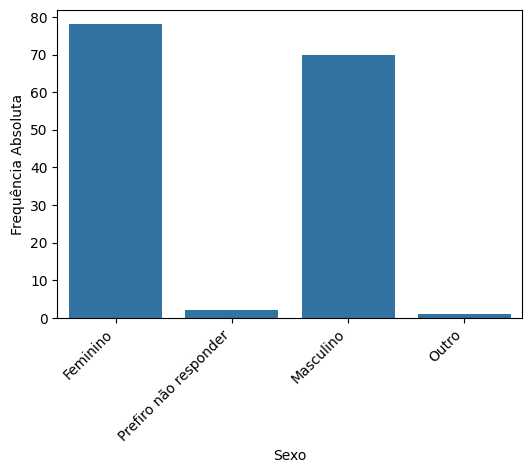

In [225]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados_estudantes_de_graduacao, x = dados_estudantes_de_graduacao['Sexo'])
plt.ylabel('Frequência Absoluta')
plt.xlabel('Sexo')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

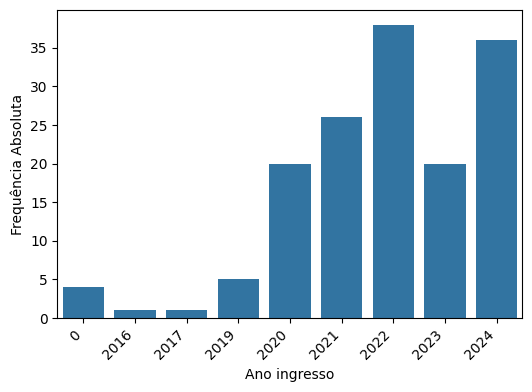

In [226]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados_estudantes_de_graduacao, x = dados_estudantes_de_graduacao['Ano_ingresso'])
plt.xlabel('Ano ingresso')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()


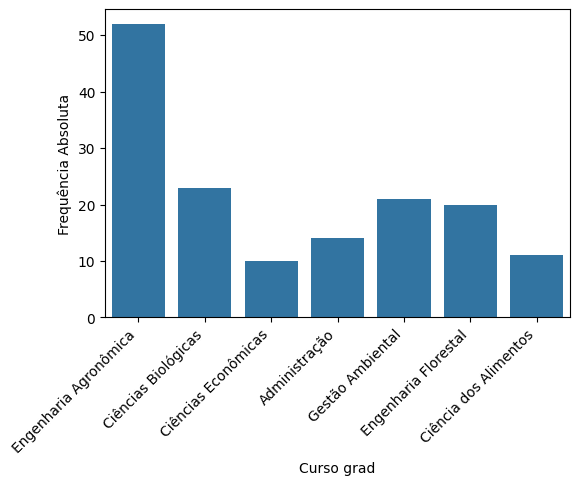

In [227]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados_estudantes_de_graduacao, x = dados_estudantes_de_graduacao['Curso_grad'])
plt.xlabel('Curso grad')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()


# Opção 1

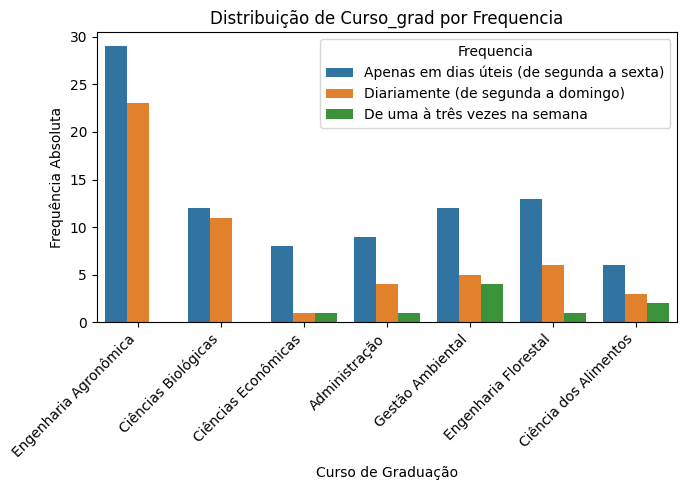

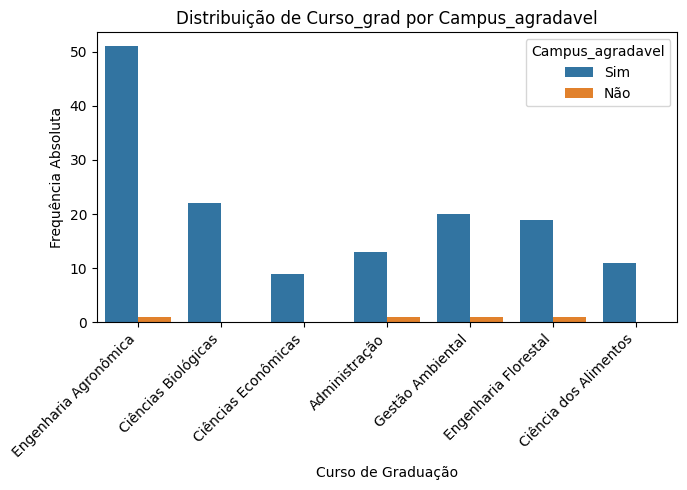

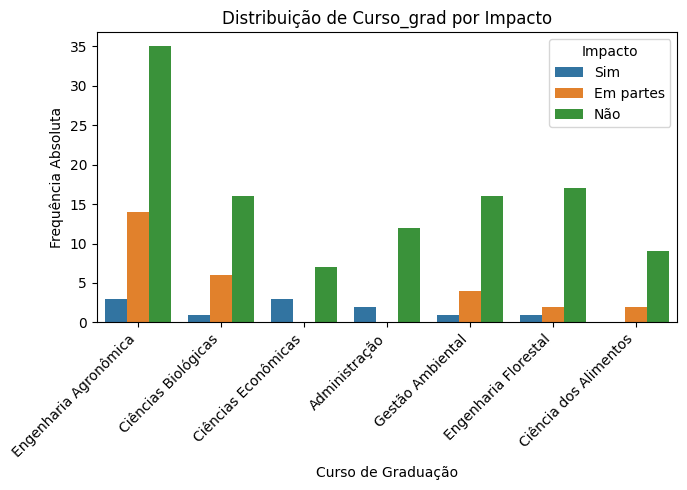

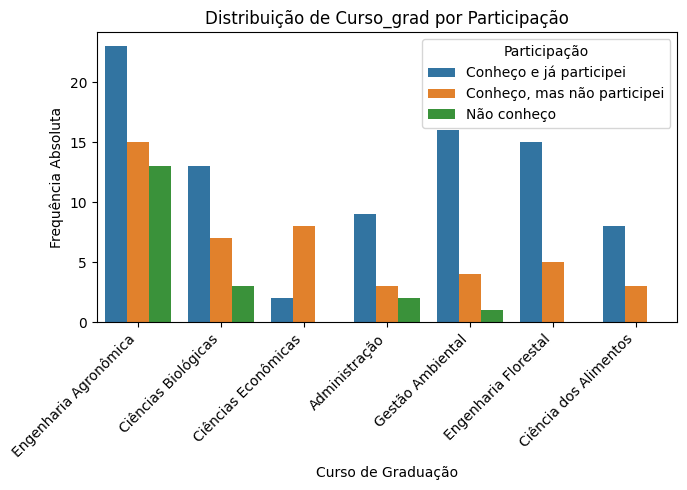

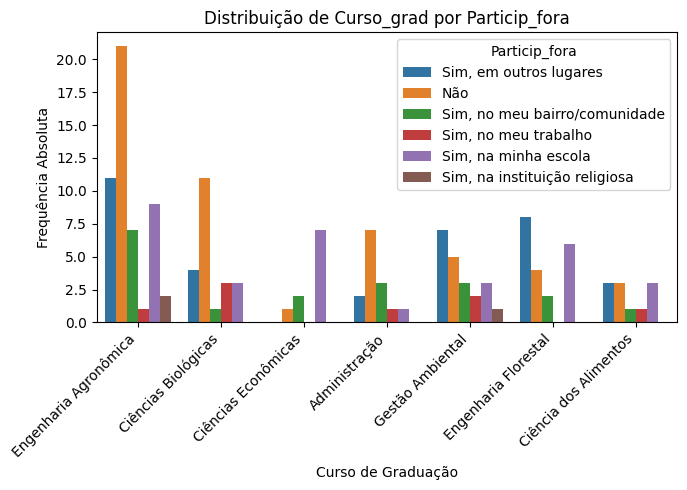

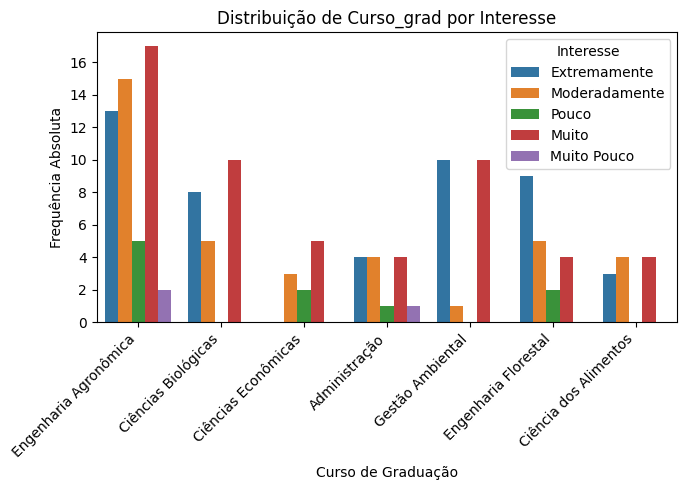

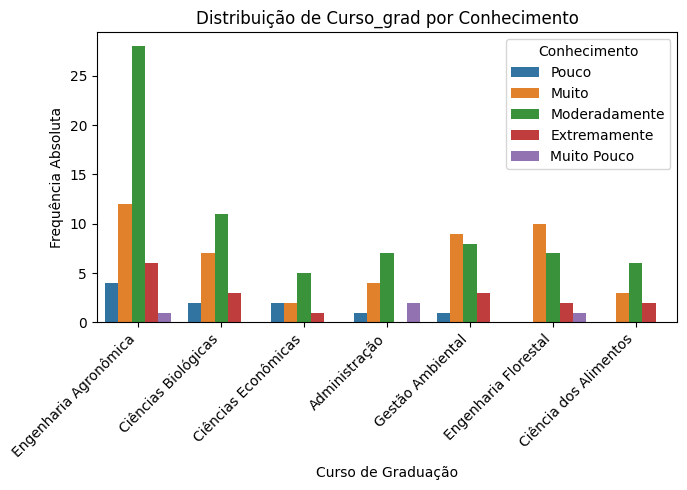

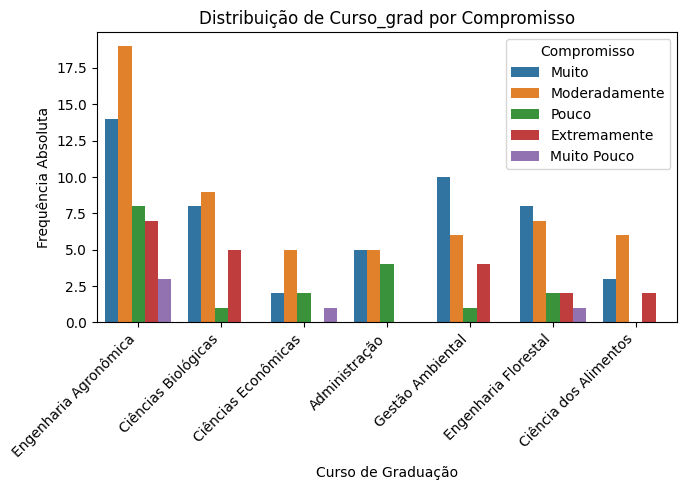

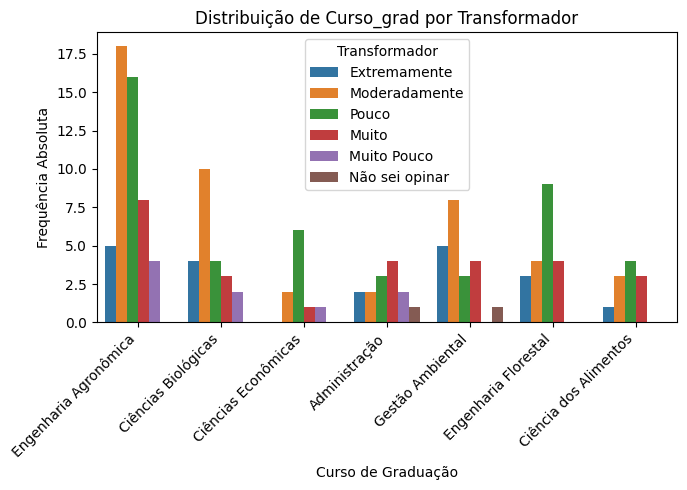

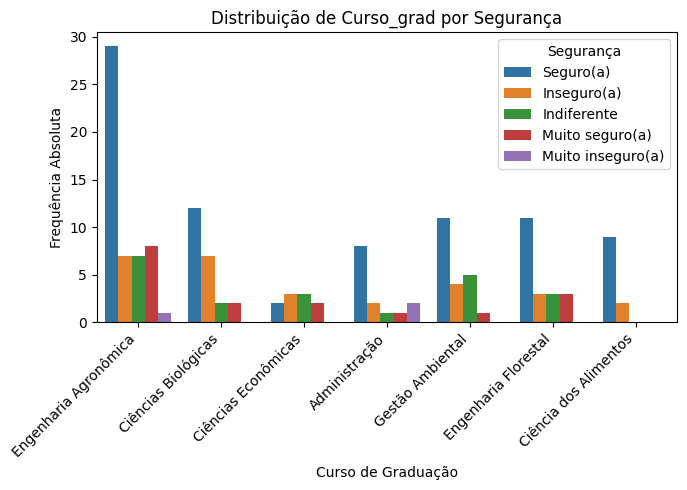

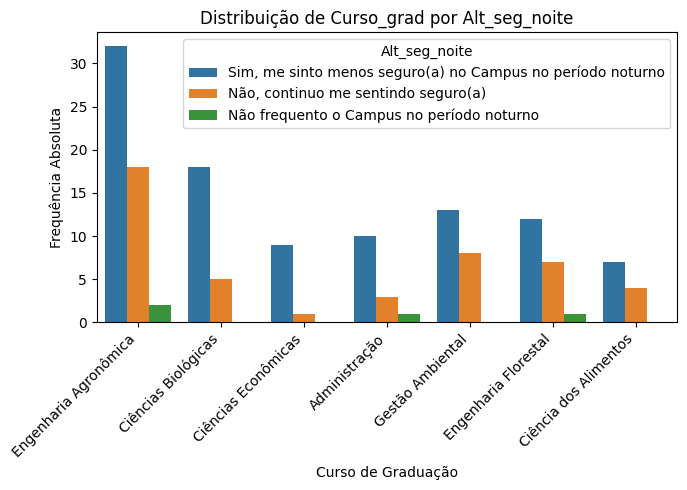

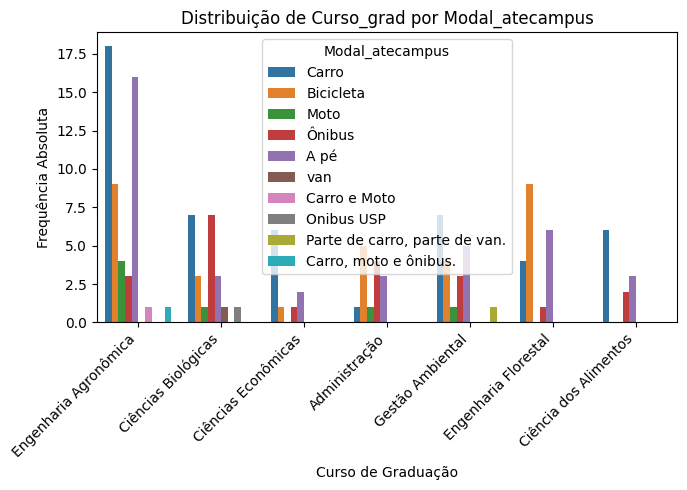

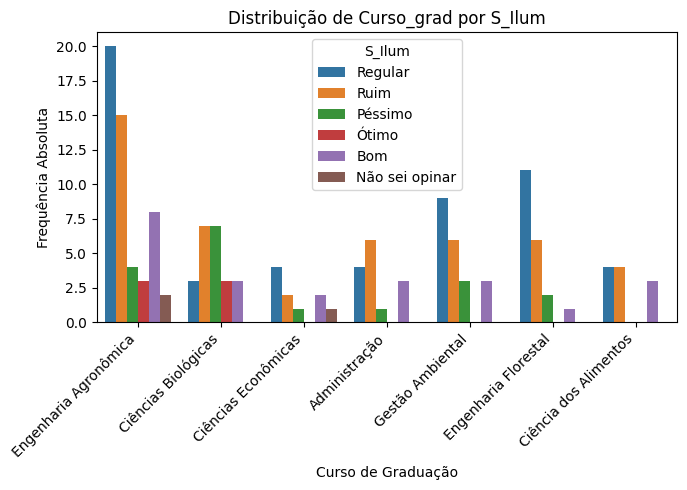

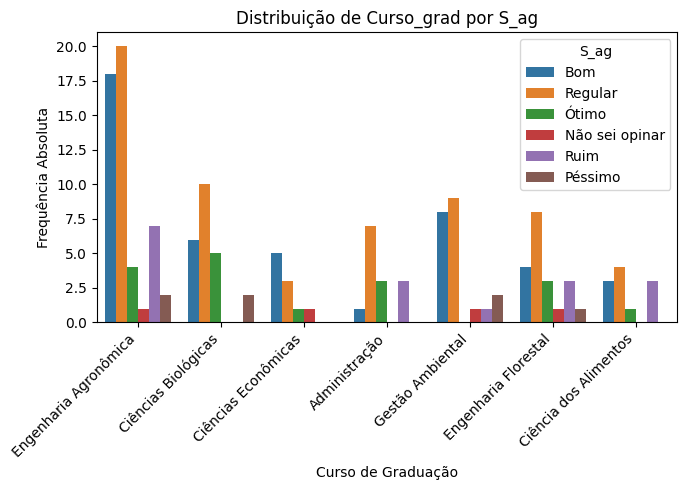

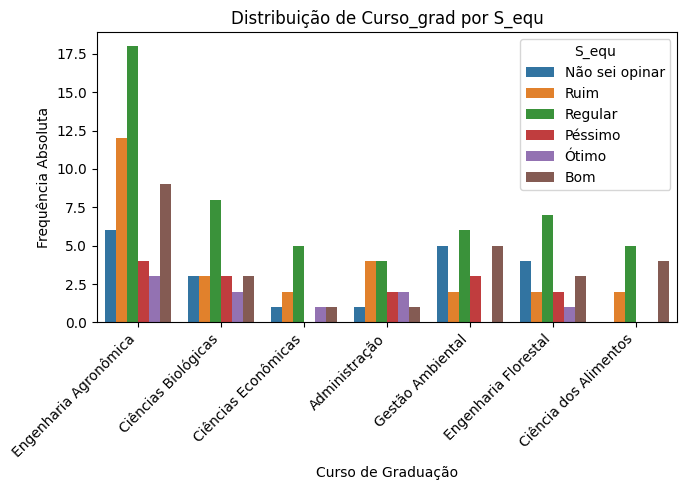

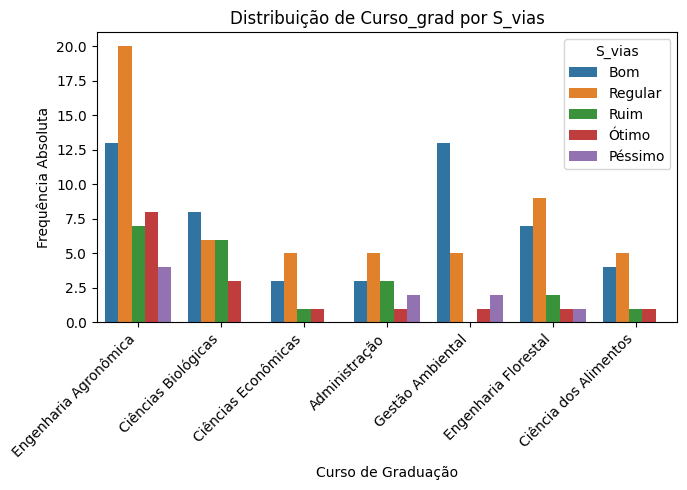

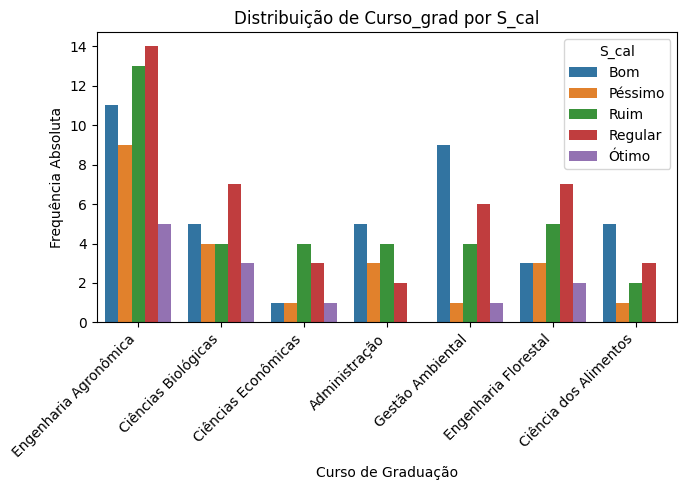

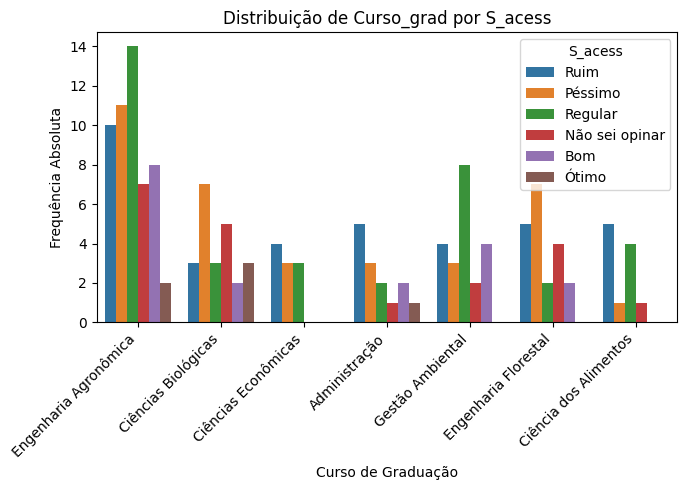

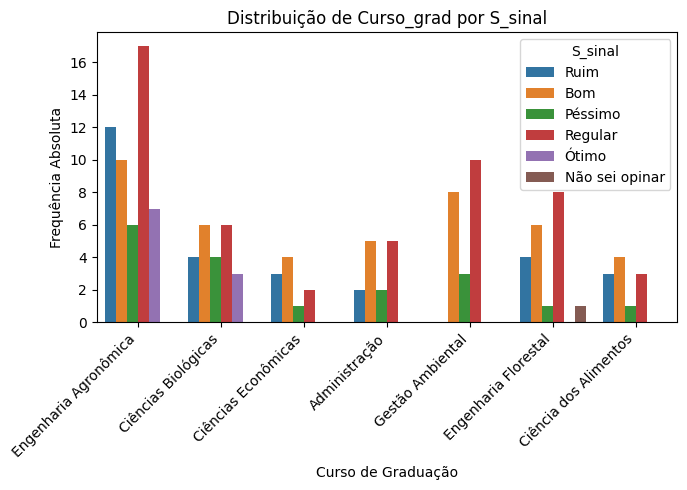

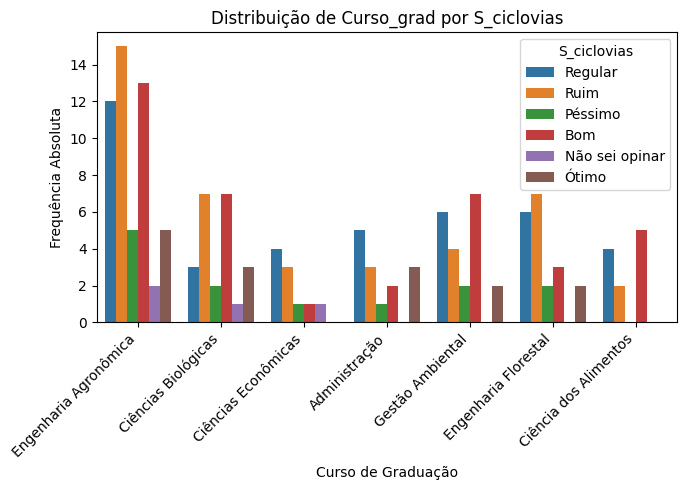

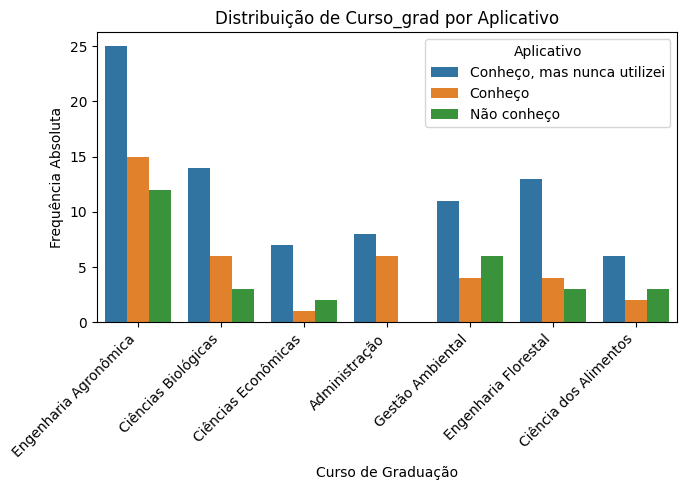

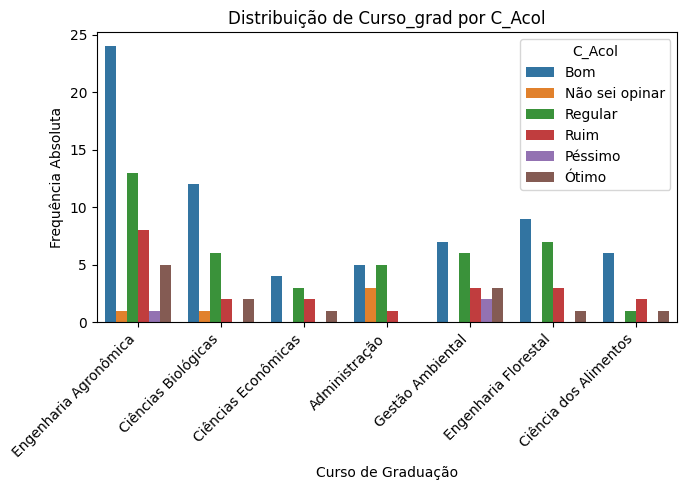

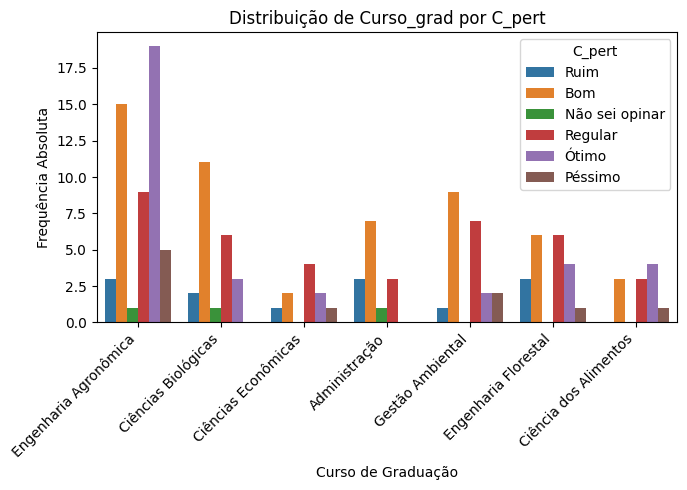

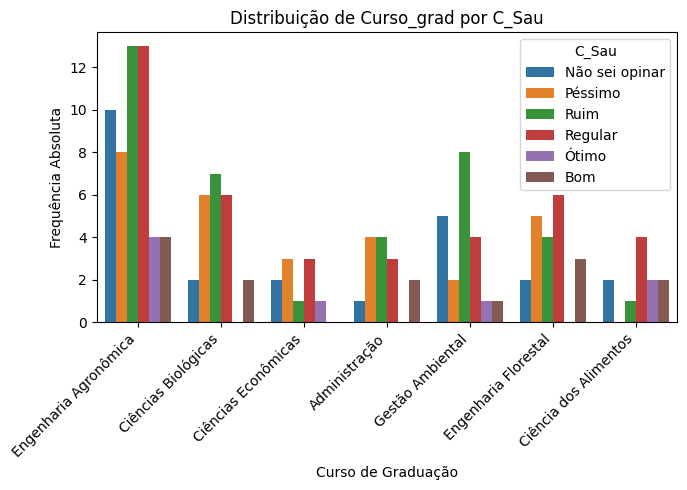

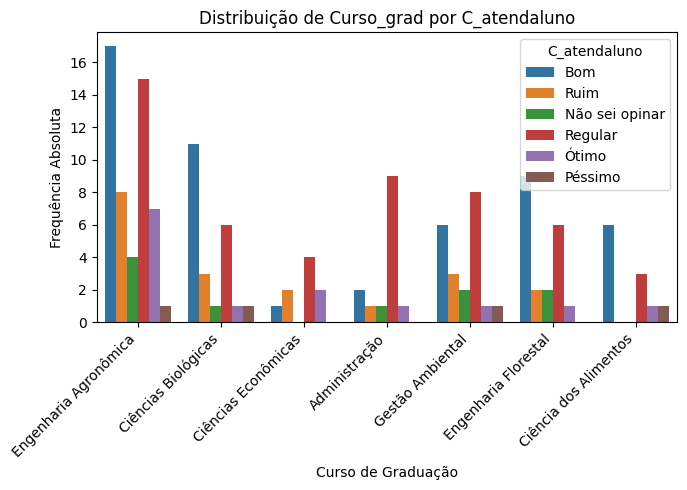

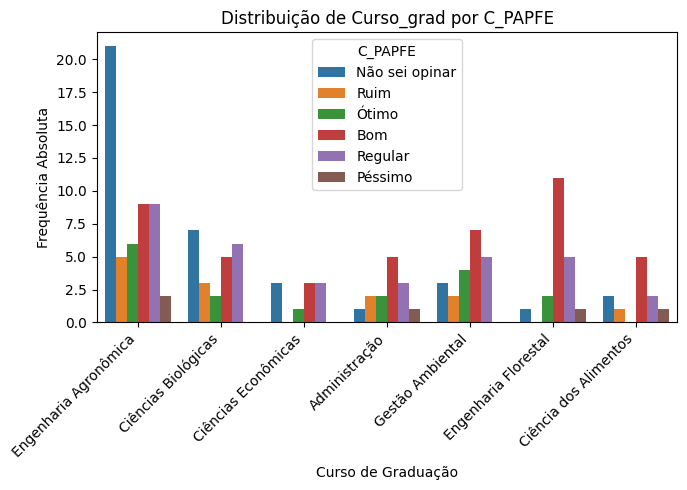

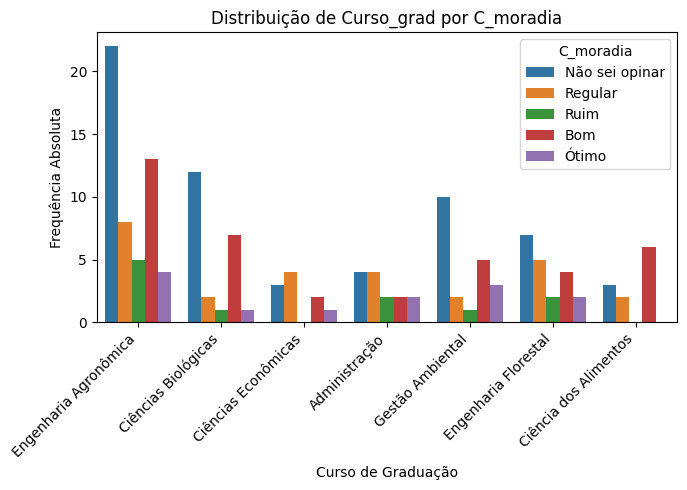

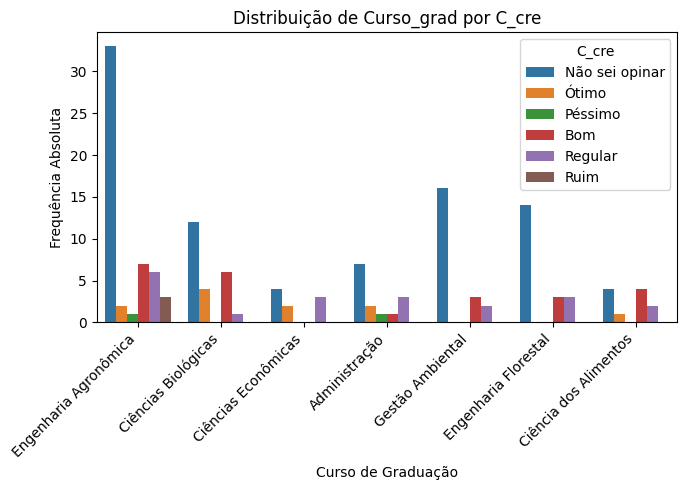

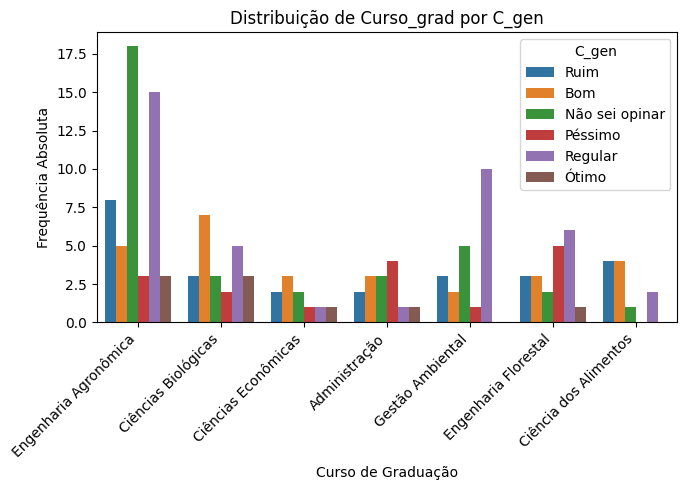

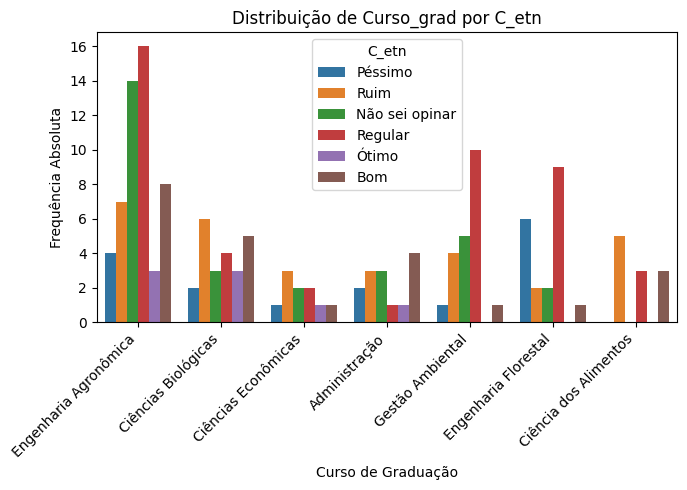

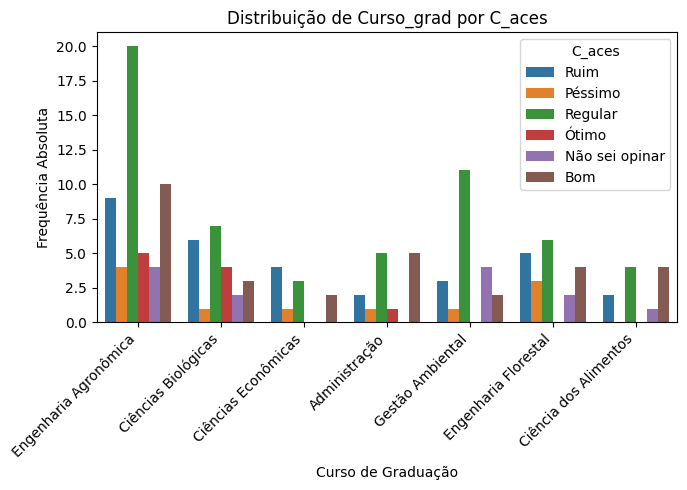

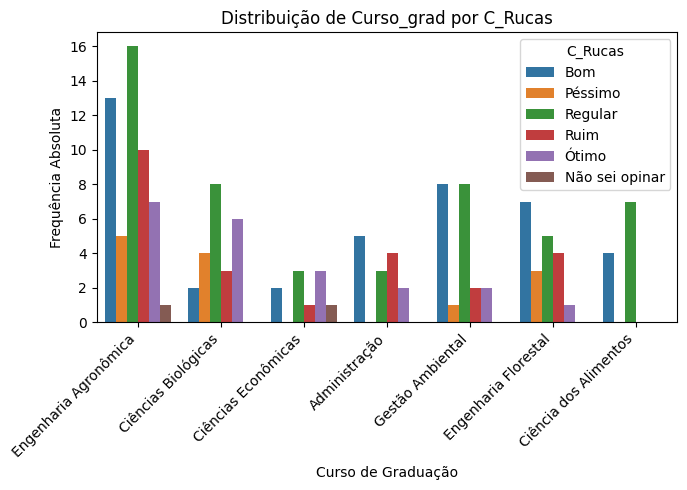

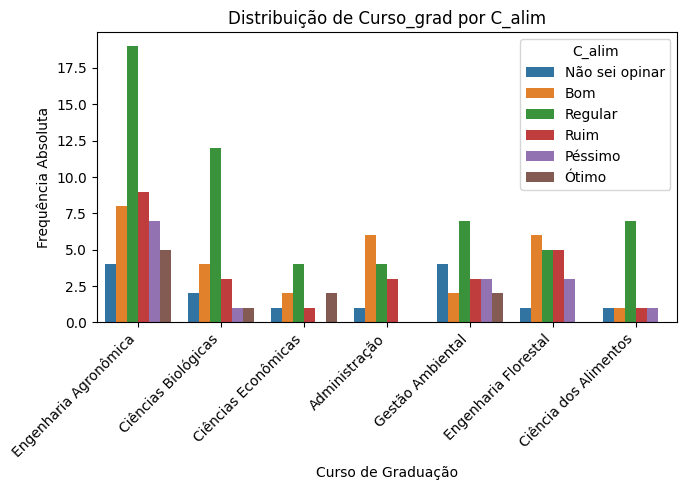

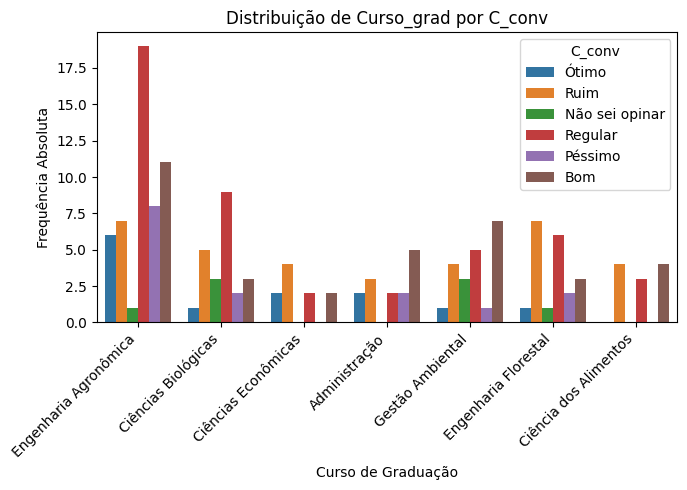

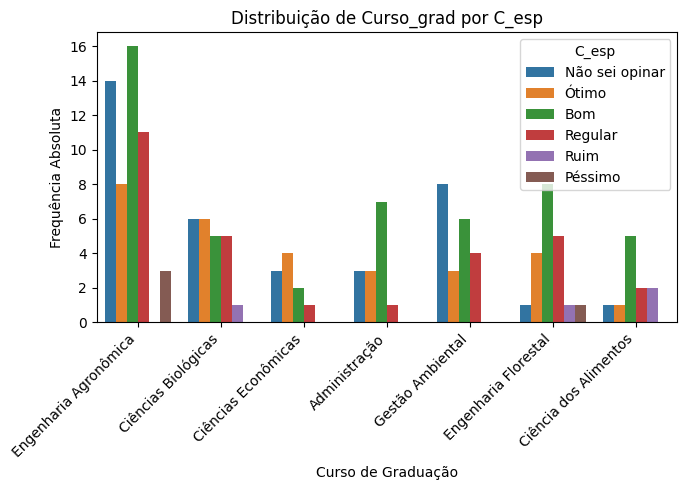

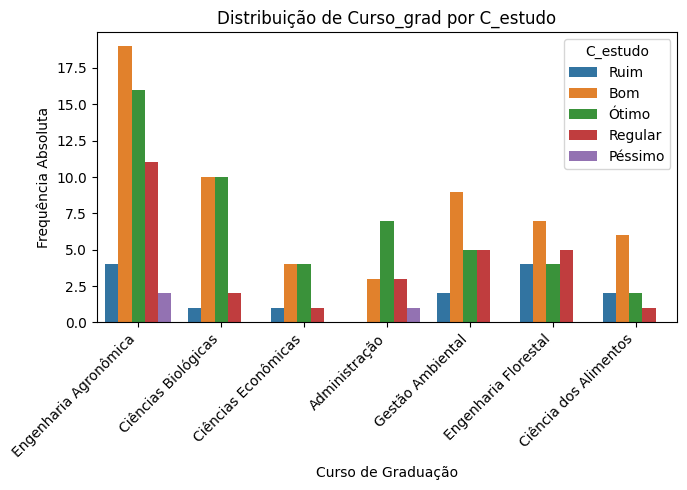

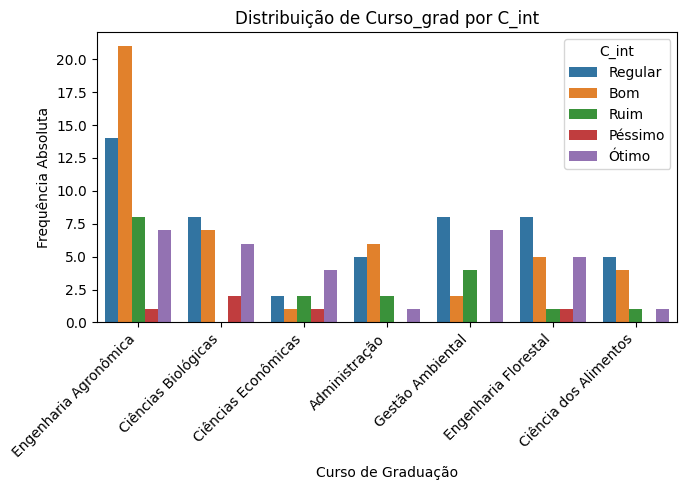

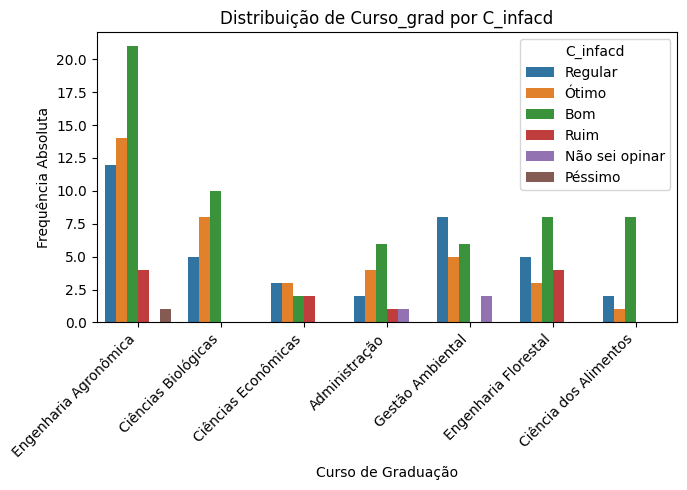

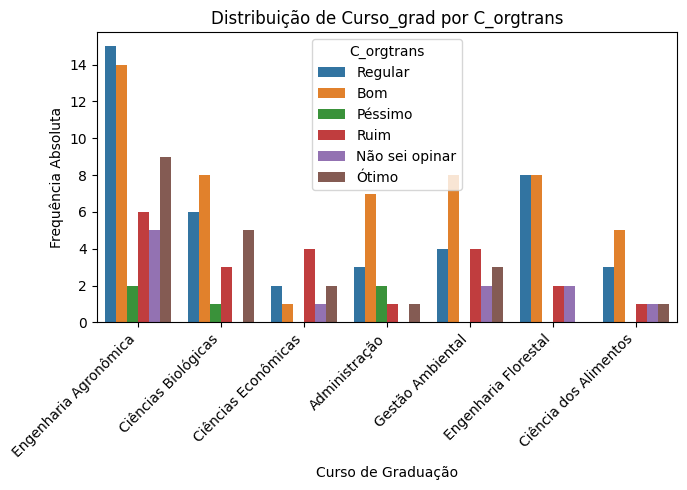

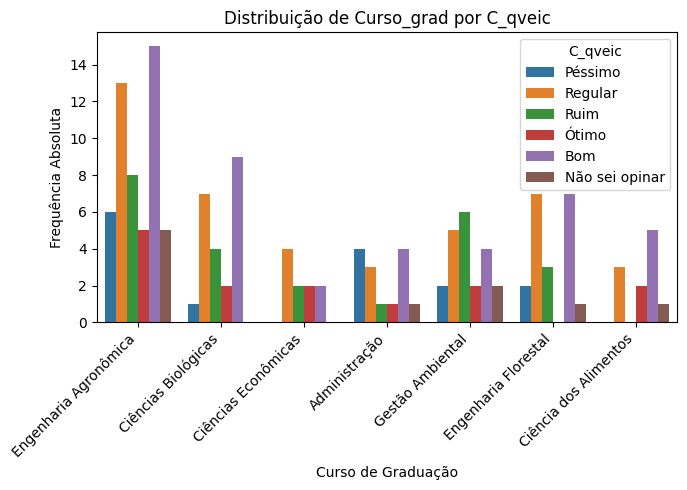

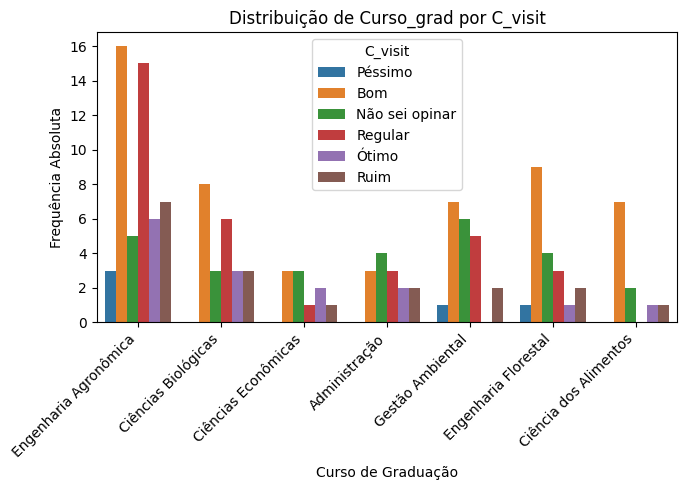

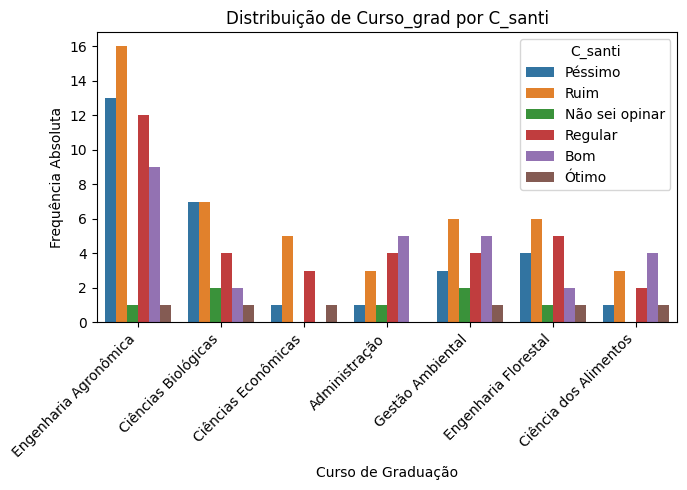

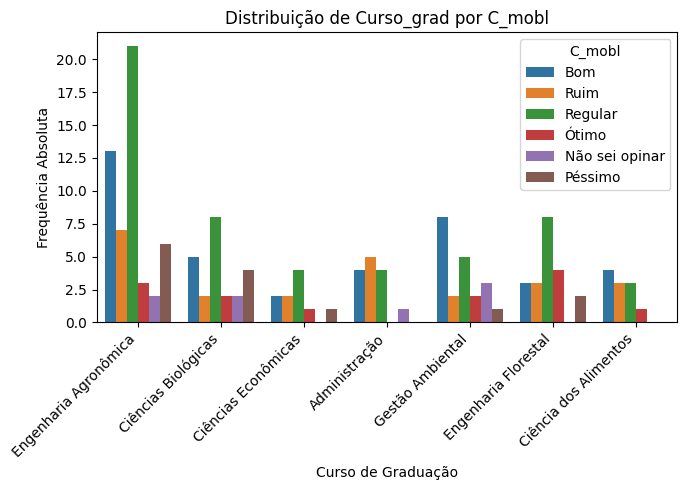

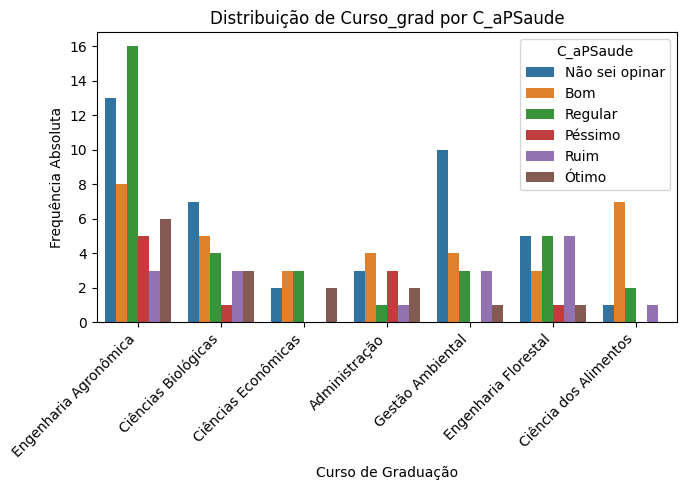

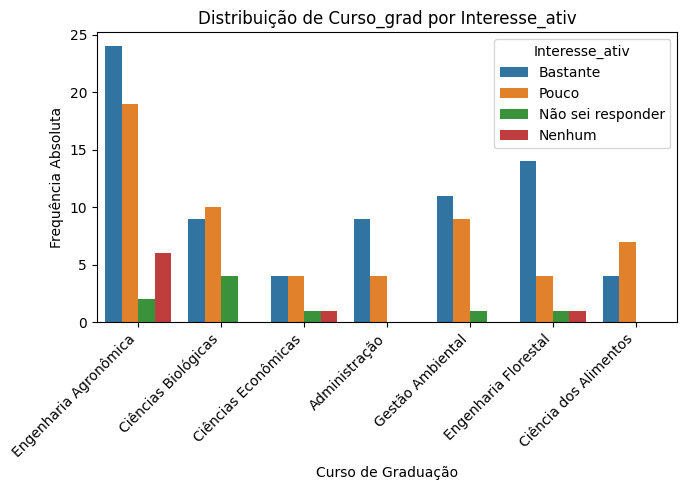

In [228]:
variables_to_plot = [
    'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação', 'Particip_fora',
    'Interesse', 'Conhecimento', 'Compromisso', 'Transformador', 'Segurança',
    'Alt_seg_noite', 'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias',
    'S_cal', 'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol',
    'C_pert', 'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
    'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
    'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_santi', 'C_mobl',
    'C_aPSaude', 'Interesse_ativ'
]

for col in variables_to_plot:
    if col in dados_estudantes_de_graduacao.columns and 'Curso_grad' in dados_estudantes_de_graduacao.columns:
        plt.figure(figsize=(7, 5))
        sns.countplot(data=dados_estudantes_de_graduacao, x='Curso_grad', hue=col)
        plt.title(f'Distribuição de Curso_grad por {col}')
        plt.xlabel('Curso de Graduação')
        plt.ylabel('Frequência Absoluta')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"One or both columns ('Curso_grad', '{col}') not found in the DataFrame.")

# Opção 2

variables_to_plot = [
    'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação', 'Particip_fora',
    'Interesse', 'Conhecimento', 'Compromisso', 'Transformador', 'Segurança',
    'Alt_seg_noite', 'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias',
    'S_cal', 'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol',
    'C_pert', 'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
    'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
    'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_santi', 'C_mobl',
    'C_aPSaude', 'Interesse_ativ'
]

cursos = dados_estudantes_de_graduacao['Curso_grad'].unique()
n_cursos = len(cursos)

# Create subplots for each variable against Curso_grad categories
for variable in variables_to_plot:
    if variable in dados_estudantes_de_graduacao.columns:
        fig, axes = plt.subplots(1, n_cursos, figsize=(25, 5), sharey=False) # Adjust figsize as needed
        fig.suptitle(f'Distribuição de {variable} por Curso de Graduação', fontsize=16)

        for i, curso in enumerate(cursos):
            subset_data = dados_estudantes_de_graduacao[dados_estudantes_de_graduacao['Curso_grad'] == curso]
            sns.countplot(data=subset_data, x=variable, ax=axes[i], order=subset_data[variable].value_counts().index)
            axes[i].set_title(curso)
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', rotation=90)
            if i > 0:
                axes[i].set_ylabel('') # Remove y-label from subsequent subplots

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        plt.show()
    else:
        print(f"Variable '{variable}' not found in the DataFrame.")

In [229]:
#from google.colab import drive
#drive.mount('/content/drive')


In [230]:
#!pip -q install "nbconvert[webpdf]==7.*"


In [231]:
#ipynb = "/content/drive/MyDrive/Colab Notebooks/graduacao.ipynb"
#!jupyter nbconvert --to webpdf "$ipynb" --allow-chromium-download \
#  --TagRemovePreprocessor.enabled=True \
#  --TagRemovePreprocessor.remove_cell_tags='["no-pdf","hide"]' \
#  --HTMLExporter.exclude_input_prompt=True \
#  --HTMLExporter.exclude_output_prompt=True
